In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat("ex3data1.mat")
X = mat["X"]
y = mat["y"]

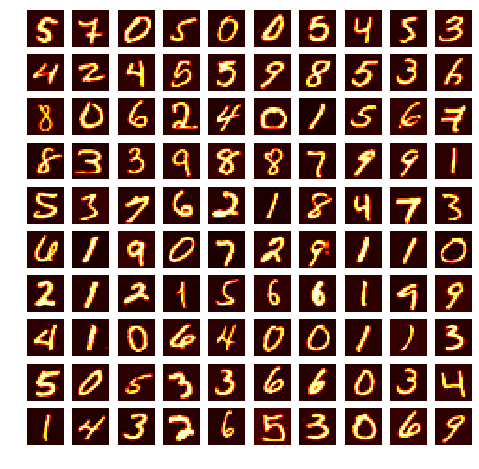

In [4]:
fig,axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"),cmap="hot")
        axis[i,j].axis("off")

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def sigmoidGradient(z):
    sigmoid = 1/(1+np.exp(-z))
    return sigmoid*(1-sigmoid)

In [22]:
def computeCost(X,y,theta,input_layer_size,hidden_layer_size,num_labels, Lambda):
    theta1 = theta[:((input_layer_size+1)*hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    theta2 = theta[((input_layer_size+1)*hidden_layer_size):].reshape(num_labels,hidden_layer_size+1)
    
    m = X.shape[0]
    J = 0
    X = np.hstack((np.ones((m,1)),X))
    y10 = np.zeros((m,num_labels))
    
    a1 = sigmoid(X @ theta1.T)
    a1 = np.hstack((np.ones((m,1)),a1))
    a2 = sigmoid(a1 @ theta2.T)
    
    for i in range(1,num_labels+1):
        y10[:,i-1][:,np.newaxis] = np.where(y==i,1,0)
    for j in range(num_labels):
        J = J + sum(-y10[:,j]*np.log(a2[:,j])-(1-y10[:,j])*np.log(1-a2[:,j]))
        
    cost = 1/m*J
    reg_J = cost + Lambda/(2*m)*(np.sum(theta1[:,1:]**2)+np.sum(theta2[:,1:]**2))
                                 
    grad1 = np.zeros((theta1.shape))
    grad2 = np.zeros((theta2.shape))
                                 
    for i in range(m):
        xi = X[i,:]
        a1i = a1[i,:]
        a2i = a2[i,:]
        d2 = a2i - y10[i,:]
        d1 = theta2.T @ d2.T * sigmoidGradient(np.hstack((1,xi @ theta1.T)))
        grad1 = grad1 + d1[1:][:,np.newaxis]@xi[:,np.newaxis].T
        grad2 = grad2 + d2.T[:,np.newaxis]@a1i[:,np.newaxis].T
                                 
    grad1 = 1/m*grad1
    grad2 = 1/m*grad2
                                 
    grad1_reg = grad1 + (Lambda/m)*np.hstack((np.zeros((theta1.shape[0],1)),theta1[:,1:]))
    grad2_reg = grad2 + (Lambda/m)*np.hstack((np.zeros((theta2.shape[0],1)),theta2[:,1:]))
                                 
    return cost,grad1,grad2,reg_J,grad1_reg,grad2_reg

In [12]:
def randInitializeWeights(L_in,L_out):
    epi = (6**1/2)/(L_in+L_out)**1/2
    W = np.random.rand(L_out,L_in+1)*(2*epi)-epi
    return W

In [13]:
def gradientDescent(X,y,theta,alpha,nbr_iter,Lambda,input_layer_size,hidden_layer_size,num_labels):
    theta1 = theta[:((input_layer_size+1)*hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    theta2 = theta[((input_layer_size+1)*hidden_layer_size):].reshape(num_labels,hidden_layer_size+1)
    
    m = len(y)
    J_history = []
    
    for i in range(nbr_iter):
        theta = np.append(theta1.flatten(),theta2.flatten())
        cost,grad1,grad2 = computeCost(X,y,theta,input_layer_size,hidden_layer_size,num_labels,Lambda)[3:]
        theta1 = theta1 - (alpha*grad1)
        theta2 = theta2 - (alpha*grad2)
        J_history.append(cost)
        
    nn_paramsFinal = np.append(theta1.flatten(),theta2.flatten())
    return nn_paramsFinal,J_history

In [14]:
def prediction(X,theta1,theta2):
    m = X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    a1 = sigmoid(X @ theta1.T)
    a1 = np.hstack((np.ones((m,1)),a1))
    a2 = sigmoid(a1 @ theta2.T)
    
    return np.argmax(a2,axis=1)+1

In [23]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

initial_theta1 = randInitializeWeights(input_layer_size,hidden_layer_size)
initial_theta2 = randInitializeWeights(hidden_layer_size,num_labels)
initial_theta = np.append(initial_theta1.flatten(),initial_theta2.flatten())

theta,J_history = gradientDescent(X,y,initial_theta,0.8,800,1,input_layer_size,hidden_layer_size,num_labels)
theta1 = theta[:((input_layer_size+1)*hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
theta2 = theta[((input_layer_size+1)*hidden_layer_size):].reshape(num_labels,hidden_layer_size+1)

In [24]:
pred = prediction(X,theta1,theta2)
print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 94.06 %
